In [1]:
import pandas as pd 
import os
from keras.models import Sequential, load_model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras import backend as K
import keras
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB7
import skimage.io
from skimage.transform import resize

from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy, categorical_crossentropy
#from keras.applications.resnet50 import preprocess_input
from keras.applications.densenet import DenseNet121,DenseNet169,preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score

import keras.callbacks as callbacks
from keras.callbacks import Callback
get_ipython().run_line_magic('config', 'InlineBackend.figure_format="svg"')
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")
SIZE = 224
NUM_CLASSES = 2
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model



In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


def get_num_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Ad.csv')
    df = df.drop(['filename'],axis=1)
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_num, Y = get_num_input()
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split( X_num, Y, test_size=0.2,random_state=42)
#Scaling the Feature columns
#scaler = StandardScaler()
#X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float)

#def get_img_input():
    #df = pd.read_csv('/DATA/akanksha_2021cs39/visualdata.csv')
    #X_img = np.zeros((len(df), 224, 224)) # change as per image size
    #Y = list()
    #for i, row in df.iterrows():
        #X_img[i] = np.array(Image.open(row['X_img']))
        #Y.append(row['class'])

    #return (X_img, Y)
    
#X_img, Y_img = get_img_input() # use one of the Ys
# X feature normalization, convert Y to one-hot representation

In [ ]:
#df = pd.read_csv('/DATA/akanksha_2021cs39/fakeAV_audio.csv')
#df.shape

In [ ]:
#df = df.drop(21253)

In [ ]:
#df.shape

In [ ]:
#df.tail()

In [ ]:
#df.to_csv('Ad.csv', index=False)

In [ ]:
#df2 = pd.read_csv('/DATA/akanksha_2021cs39/fakeAV_visual.csv')
#df2.shape

In [ ]:
#df2.head()

In [ ]:
#df2 = df2.drop([0 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
#df2.shape

In [ ]:
#df2.to_csv('Vd.csv', header=None, index=False)

In [4]:
def get_img_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Vd.csv')
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_img, Y_img = get_img_input()
encoder = LabelEncoder()
Y_img = encoder.fit_transform(Y_img)
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split( X_img, Y_img, test_size=0.2,random_state=42)

In [5]:
y_train=y_audio_train # both audio and video samples are synchronized so both have same levels that is why 
                                                     #initialized here with one (audio or video) label.
y_test=y_audio_test

In [6]:
print(X_audio_train.shape)
print(X_img_train.shape)
print(X_audio_test.shape)
print(X_img_test.shape)
print(y_audio_train.shape)
print(y_img_train.shape)
print(y_audio_test.shape)
print(y_img_test.shape)

(17001, 133)
(17001, 50176)
(4251, 133)
(4251, 50176)
(17001,)
(17001,)
(4251,)
(4251,)


In [7]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    img_input = Input(shape=(50176,)) 
    ## branch 1 with image input
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    out_a = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    
    #x = MaxPooling2D((2, 2))(x)
    #x = Flatten()(x)
    #out_a = Dense(64)(x)

    num_input = Input(shape=(133,))        ## branch 2 with numerical input
    x1 = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(num_input)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    out_b = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)

    concatenated = concatenate([out_a, out_b])    ## concatenate the two branches
    out = Dense(1, activation='sigmoid')(concatenated)
    model = Model([img_input, num_input], out)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model
    
    
    

### Just for sanity check

#print(model.predict(X))

In [8]:
model = compile_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50176)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 133)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         51381248    input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 1024)         137216      input_2[0][0]                    
______________________________________________________________________________________________

In [9]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history=model.fit([X_img_train, X_audio_train], y_train, batch_size=256, epochs=1000,
                            validation_data=([X_img_test, X_audio_test], y_test), callbacks=[es])

Epoch 1/1000
67/67 [==============================] - 25s 342ms/step - loss: 146.1197 - accuracy: 0.8989 - val_loss: 41.2719 - val_accuracy: 0.9475
Epoch 2/1000
67/67 [==============================] - 20s 298ms/step - loss: 44.1055 - accuracy: 0.8952 - val_loss: 30.5416 - val_accuracy: 0.9452
Epoch 3/1000
67/67 [==============================] - 19s 291ms/step - loss: 30.1039 - accuracy: 0.9006 - val_loss: 24.7888 - val_accuracy: 0.9475
Epoch 4/1000
67/67 [==============================] - 19s 287ms/step - loss: 23.2082 - accuracy: 0.9033 - val_loss: 21.0177 - val_accuracy: 0.9475
Epoch 5/1000
67/67 [==============================] - 19s 281ms/step - loss: 19.4581 - accuracy: 0.9364 - val_loss: 18.0318 - val_accuracy: 0.9475
Epoch 6/1000
67/67 [==============================] - 19s 280ms/step - loss: 17.1061 - accuracy: 0.9396 - val_loss: 16.2100 - val_accuracy: 0.9475
Epoch 7/1000
67/67 [==============================] - 19s 280ms/step - loss: 15.3120 - accuracy: 0.9425 - val_loss: 1

Epoch 57/1000
67/67 [==============================] - 19s 284ms/step - loss: 3.4270 - accuracy: 0.9454 - val_loss: 3.3661 - val_accuracy: 0.9475
Epoch 58/1000
67/67 [==============================] - 19s 281ms/step - loss: 3.3015 - accuracy: 0.9458 - val_loss: 3.2394 - val_accuracy: 0.9475
Epoch 59/1000
67/67 [==============================] - 19s 278ms/step - loss: 3.1956 - accuracy: 0.9459 - val_loss: 3.1364 - val_accuracy: 0.9475
Epoch 60/1000
67/67 [==============================] - 19s 278ms/step - loss: 3.1404 - accuracy: 0.9457 - val_loss: 3.0803 - val_accuracy: 0.9475
Epoch 61/1000
67/67 [==============================] - 18s 276ms/step - loss: 3.0402 - accuracy: 0.9458 - val_loss: 2.9885 - val_accuracy: 0.9475
Epoch 62/1000
67/67 [==============================] - 19s 284ms/step - loss: 2.9624 - accuracy: 0.9458 - val_loss: 2.9090 - val_accuracy: 0.9475
Epoch 63/1000
67/67 [==============================] - 19s 282ms/step - loss: 2.9006 - accuracy: 0.9458 - val_loss: 2.8249 -

67/67 [==============================] - 18s 275ms/step - loss: 0.4964 - accuracy: 0.9459 - val_loss: 0.4894 - val_accuracy: 0.9475
Epoch 114/1000
67/67 [==============================] - 19s 285ms/step - loss: 0.4790 - accuracy: 0.9459 - val_loss: 0.4636 - val_accuracy: 0.9475
Epoch 115/1000
67/67 [==============================] - 19s 282ms/step - loss: 0.4626 - accuracy: 0.9459 - val_loss: 0.4463 - val_accuracy: 0.9475
Epoch 116/1000
67/67 [==============================] - 19s 285ms/step - loss: 0.4464 - accuracy: 0.9459 - val_loss: 0.4304 - val_accuracy: 0.9475
Epoch 117/1000
67/67 [==============================] - 19s 288ms/step - loss: 0.4294 - accuracy: 0.9459 - val_loss: 0.4157 - val_accuracy: 0.9475
Epoch 118/1000
67/67 [==============================] - 19s 282ms/step - loss: 0.4144 - accuracy: 0.9459 - val_loss: 0.4006 - val_accuracy: 0.9475
Epoch 119/1000
67/67 [==============================] - 19s 290ms/step - loss: 0.3998 - accuracy: 0.9459 - val_loss: 0.3886 - val_acc

Epoch 169/1000
67/67 [==============================] - 20s 294ms/step - loss: 0.2070 - accuracy: 0.9459 - val_loss: 0.2005 - val_accuracy: 0.9475
Epoch 170/1000
67/67 [==============================] - 19s 290ms/step - loss: 0.2078 - accuracy: 0.9459 - val_loss: 0.2018 - val_accuracy: 0.9475
Epoch 171/1000
67/67 [==============================] - 20s 292ms/step - loss: 0.2068 - accuracy: 0.9459 - val_loss: 0.2007 - val_accuracy: 0.9475
Epoch 172/1000
67/67 [==============================] - 19s 285ms/step - loss: 0.2063 - accuracy: 0.9459 - val_loss: 0.2063 - val_accuracy: 0.9475
Epoch 173/1000
67/67 [==============================] - 19s 288ms/step - loss: 0.2070 - accuracy: 0.9459 - val_loss: 0.2009 - val_accuracy: 0.9475
Epoch 174/1000
67/67 [==============================] - 20s 295ms/step - loss: 0.2071 - accuracy: 0.9459 - val_loss: 0.2007 - val_accuracy: 0.9475
Epoch 175/1000
67/67 [==============================] - 18s 275ms/step - loss: 0.2092 - accuracy: 0.9459 - val_loss: 0

Epoch 225/1000
67/67 [==============================] - 19s 283ms/step - loss: 0.2067 - accuracy: 0.9459 - val_loss: 0.2076 - val_accuracy: 0.9475
Epoch 226/1000
67/67 [==============================] - 19s 286ms/step - loss: 0.2050 - accuracy: 0.9459 - val_loss: 0.1987 - val_accuracy: 0.9475
Epoch 227/1000
67/67 [==============================] - 19s 291ms/step - loss: 0.2055 - accuracy: 0.9459 - val_loss: 0.2014 - val_accuracy: 0.9475
Epoch 228/1000
67/67 [==============================] - 19s 290ms/step - loss: 0.2051 - accuracy: 0.9459 - val_loss: 0.1989 - val_accuracy: 0.9475
Epoch 229/1000
67/67 [==============================] - 21s 313ms/step - loss: 0.2045 - accuracy: 0.9459 - val_loss: 0.1981 - val_accuracy: 0.9475
Epoch 230/1000
67/67 [==============================] - 23s 342ms/step - loss: 0.2045 - accuracy: 0.9459 - val_loss: 0.2010 - val_accuracy: 0.9475
Epoch 231/1000
67/67 [==============================] - 23s 344ms/step - loss: 0.2038 - accuracy: 0.9459 - val_loss: 0

Epoch 281/1000
67/67 [==============================] - 24s 356ms/step - loss: 0.2052 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 282/1000
67/67 [==============================] - 24s 360ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1977 - val_accuracy: 0.9475
Epoch 283/1000
67/67 [==============================] - 24s 356ms/step - loss: 0.2060 - accuracy: 0.9459 - val_loss: 0.1983 - val_accuracy: 0.9475
Epoch 284/1000
67/67 [==============================] - 23s 351ms/step - loss: 0.2044 - accuracy: 0.9459 - val_loss: 0.1985 - val_accuracy: 0.9475
Epoch 285/1000
67/67 [==============================] - 26s 396ms/step - loss: 0.2025 - accuracy: 0.9459 - val_loss: 0.2044 - val_accuracy: 0.9475
Epoch 286/1000
67/67 [==============================] - 28s 414ms/step - loss: 0.2036 - accuracy: 0.9459 - val_loss: 0.1965 - val_accuracy: 0.9475
Epoch 287/1000
67/67 [==============================] - 27s 401ms/step - loss: 0.2039 - accuracy: 0.9459 - val_loss: 0

Epoch 337/1000
67/67 [==============================] - 28s 413ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1979 - val_accuracy: 0.9475
Epoch 338/1000
67/67 [==============================] - 27s 397ms/step - loss: 0.2029 - accuracy: 0.9459 - val_loss: 0.1963 - val_accuracy: 0.9475
Epoch 339/1000
67/67 [==============================] - 28s 412ms/step - loss: 0.2012 - accuracy: 0.9459 - val_loss: 0.1961 - val_accuracy: 0.9475
Epoch 340/1000
67/67 [==============================] - 27s 403ms/step - loss: 0.2022 - accuracy: 0.9459 - val_loss: 0.1970 - val_accuracy: 0.9475
Epoch 341/1000
67/67 [==============================] - 27s 397ms/step - loss: 0.2026 - accuracy: 0.9459 - val_loss: 0.1963 - val_accuracy: 0.9475
Epoch 342/1000
67/67 [==============================] - 28s 420ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1991 - val_accuracy: 0.9475
Epoch 343/1000
67/67 [==============================] - 28s 418ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0

Epoch 393/1000
67/67 [==============================] - 28s 417ms/step - loss: 0.2025 - accuracy: 0.9459 - val_loss: 0.1959 - val_accuracy: 0.9475
Epoch 394/1000
67/67 [==============================] - 28s 421ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 395/1000
67/67 [==============================] - 26s 393ms/step - loss: 0.2049 - accuracy: 0.9459 - val_loss: 0.1991 - val_accuracy: 0.9475
Epoch 396/1000
67/67 [==============================] - 27s 408ms/step - loss: 0.2030 - accuracy: 0.9459 - val_loss: 0.1982 - val_accuracy: 0.9475
Epoch 397/1000
67/67 [==============================] - 27s 399ms/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 0.1973 - val_accuracy: 0.9475
Epoch 398/1000
67/67 [==============================] - 26s 391ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.1974 - val_accuracy: 0.9475
Epoch 399/1000
67/67 [==============================] - 27s 408ms/step - loss: 0.2026 - accuracy: 0.9459 - val_loss: 0

Epoch 449/1000
67/67 [==============================] - 27s 407ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1949 - val_accuracy: 0.9475
Epoch 450/1000
67/67 [==============================] - 26s 391ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1959 - val_accuracy: 0.9475
Epoch 451/1000
67/67 [==============================] - 27s 408ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1958 - val_accuracy: 0.9475
Epoch 452/1000
67/67 [==============================] - 26s 388ms/step - loss: 0.2031 - accuracy: 0.9459 - val_loss: 0.2044 - val_accuracy: 0.9475
Epoch 453/1000
67/67 [==============================] - 27s 404ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1959 - val_accuracy: 0.9475
Epoch 454/1000
67/67 [==============================] - 26s 393ms/step - loss: 0.2052 - accuracy: 0.9459 - val_loss: 0.1973 - val_accuracy: 0.9475
Epoch 455/1000
67/67 [==============================] - 26s 389ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0

Epoch 505/1000
67/67 [==============================] - 27s 404ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1942 - val_accuracy: 0.9475
Epoch 506/1000
67/67 [==============================] - 27s 411ms/step - loss: 0.2039 - accuracy: 0.9459 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 507/1000
67/67 [==============================] - 27s 408ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.1958 - val_accuracy: 0.9475
Epoch 508/1000
67/67 [==============================] - 29s 437ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1956 - val_accuracy: 0.9475
Epoch 509/1000
67/67 [==============================] - 26s 395ms/step - loss: 0.2003 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 510/1000
67/67 [==============================] - 28s 412ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1970 - val_accuracy: 0.9475
Epoch 511/1000
67/67 [==============================] - 27s 406ms/step - loss: 0.2037 - accuracy: 0.9459 - val_loss: 0

Epoch 561/1000
67/67 [==============================] - 27s 407ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1992 - val_accuracy: 0.9475
Epoch 562/1000
67/67 [==============================] - 26s 389ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1946 - val_accuracy: 0.9475
Epoch 563/1000
67/67 [==============================] - 27s 408ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1990 - val_accuracy: 0.9475
Epoch 564/1000
67/67 [==============================] - 26s 390ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 565/1000
67/67 [==============================] - 26s 395ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1964 - val_accuracy: 0.9475
Epoch 566/1000
67/67 [==============================] - 27s 399ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1939 - val_accuracy: 0.9475
Epoch 567/1000
67/67 [==============================] - 26s 390ms/step - loss: 0.2004 - accuracy: 0.9459 - val_loss: 0

Epoch 617/1000
67/67 [==============================] - 26s 387ms/step - loss: 0.2026 - accuracy: 0.9459 - val_loss: 0.1987 - val_accuracy: 0.9475
Epoch 618/1000
67/67 [==============================] - 27s 406ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1952 - val_accuracy: 0.9475
Epoch 619/1000
67/67 [==============================] - 26s 391ms/step - loss: 0.2013 - accuracy: 0.9459 - val_loss: 0.2004 - val_accuracy: 0.9475
Epoch 620/1000
67/67 [==============================] - 27s 409ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1931 - val_accuracy: 0.9475
Epoch 621/1000
67/67 [==============================] - 27s 400ms/step - loss: 0.2016 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 622/1000
67/67 [==============================] - 26s 394ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1938 - val_accuracy: 0.9475
Epoch 623/1000
67/67 [==============================] - 27s 402ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0

Epoch 673/1000
67/67 [==============================] - 22s 333ms/step - loss: 0.2005 - accuracy: 0.9459 - val_loss: 0.1937 - val_accuracy: 0.9475
Epoch 674/1000
67/67 [==============================] - 23s 337ms/step - loss: 0.1998 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 675/1000
67/67 [==============================] - 23s 337ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1965 - val_accuracy: 0.9475
Epoch 676/1000
67/67 [==============================] - 23s 338ms/step - loss: 0.2012 - accuracy: 0.9459 - val_loss: 0.1936 - val_accuracy: 0.9475
Epoch 677/1000
67/67 [==============================] - 22s 336ms/step - loss: 0.2022 - accuracy: 0.9459 - val_loss: 0.1935 - val_accuracy: 0.9475
Epoch 678/1000
67/67 [==============================] - 23s 339ms/step - loss: 0.2002 - accuracy: 0.9459 - val_loss: 0.1938 - val_accuracy: 0.9475
Epoch 679/1000
67/67 [==============================] - 23s 338ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0

Epoch 729/1000
67/67 [==============================] - 22s 332ms/step - loss: 0.2005 - accuracy: 0.9459 - val_loss: 0.1953 - val_accuracy: 0.9475
Epoch 730/1000
67/67 [==============================] - 22s 335ms/step - loss: 0.1989 - accuracy: 0.9459 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 731/1000
67/67 [==============================] - 23s 347ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1929 - val_accuracy: 0.9475
Epoch 732/1000
67/67 [==============================] - 24s 355ms/step - loss: 0.2016 - accuracy: 0.9459 - val_loss: 0.1966 - val_accuracy: 0.9475
Epoch 733/1000
67/67 [==============================] - 22s 324ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 734/1000
67/67 [==============================] - 19s 286ms/step - loss: 0.2013 - accuracy: 0.9459 - val_loss: 0.1942 - val_accuracy: 0.9475
Epoch 735/1000
67/67 [==============================] - 19s 284ms/step - loss: 0.2002 - accuracy: 0.9459 - val_loss: 0

Epoch 785/1000
67/67 [==============================] - 23s 337ms/step - loss: 0.1996 - accuracy: 0.9459 - val_loss: 0.1956 - val_accuracy: 0.9475
Epoch 786/1000
67/67 [==============================] - 23s 337ms/step - loss: 0.1993 - accuracy: 0.9459 - val_loss: 0.1932 - val_accuracy: 0.9475
Epoch 787/1000
67/67 [==============================] - 23s 343ms/step - loss: 0.1987 - accuracy: 0.9459 - val_loss: 0.1929 - val_accuracy: 0.9475
Epoch 788/1000
67/67 [==============================] - 22s 333ms/step - loss: 0.1997 - accuracy: 0.9459 - val_loss: 0.1948 - val_accuracy: 0.9475
Epoch 789/1000
67/67 [==============================] - 22s 336ms/step - loss: 0.1992 - accuracy: 0.9459 - val_loss: 0.1947 - val_accuracy: 0.9475
Epoch 790/1000
67/67 [==============================] - 23s 343ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1974 - val_accuracy: 0.9475
Epoch 791/1000
67/67 [==============================] - 23s 347ms/step - loss: 0.2013 - accuracy: 0.9459 - val_loss: 0

Epoch 841/1000
67/67 [==============================] - 23s 338ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 842/1000
67/67 [==============================] - 23s 343ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1973 - val_accuracy: 0.9475
Epoch 843/1000
67/67 [==============================] - 23s 338ms/step - loss: 0.2007 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 844/1000
67/67 [==============================] - 22s 336ms/step - loss: 0.2007 - accuracy: 0.9459 - val_loss: 0.1937 - val_accuracy: 0.9475
Epoch 845/1000
67/67 [==============================] - 23s 339ms/step - loss: 0.1993 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 846/1000
67/67 [==============================] - 24s 352ms/step - loss: 0.2022 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 847/1000
67/67 [==============================] - 25s 369ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0

Epoch 897/1000
67/67 [==============================] - 27s 404ms/step - loss: 0.2022 - accuracy: 0.9459 - val_loss: 0.1933 - val_accuracy: 0.9475
Epoch 898/1000
67/67 [==============================] - 27s 404ms/step - loss: 0.1998 - accuracy: 0.9459 - val_loss: 0.1928 - val_accuracy: 0.9475
Epoch 899/1000
67/67 [==============================] - 24s 354ms/step - loss: 0.1984 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 900/1000
67/67 [==============================] - 22s 334ms/step - loss: 0.1994 - accuracy: 0.9459 - val_loss: 0.1928 - val_accuracy: 0.9475
Epoch 901/1000
67/67 [==============================] - 23s 337ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 902/1000
67/67 [==============================] - 23s 339ms/step - loss: 0.2000 - accuracy: 0.9459 - val_loss: 0.1928 - val_accuracy: 0.9475
Epoch 903/1000
67/67 [==============================] - 23s 336ms/step - loss: 0.2007 - accuracy: 0.9459 - val_loss: 0

Epoch 953/1000
67/67 [==============================] - 22s 335ms/step - loss: 0.1994 - accuracy: 0.9459 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 954/1000
67/67 [==============================] - 22s 335ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1928 - val_accuracy: 0.9475
Epoch 955/1000
67/67 [==============================] - 22s 335ms/step - loss: 0.1989 - accuracy: 0.9459 - val_loss: 0.1932 - val_accuracy: 0.9475
Epoch 956/1000
67/67 [==============================] - 22s 330ms/step - loss: 0.1991 - accuracy: 0.9459 - val_loss: 0.1932 - val_accuracy: 0.9475
Epoch 957/1000
67/67 [==============================] - 22s 333ms/step - loss: 0.1995 - accuracy: 0.9459 - val_loss: 0.1931 - val_accuracy: 0.9475
Epoch 958/1000
67/67 [==============================] - 23s 343ms/step - loss: 0.2005 - accuracy: 0.9459 - val_loss: 0.1919 - val_accuracy: 0.9475
Epoch 959/1000
67/67 [==============================] - 23s 345ms/step - loss: 0.1990 - accuracy: 0.9459 - val_loss: 0

In [10]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

In [11]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

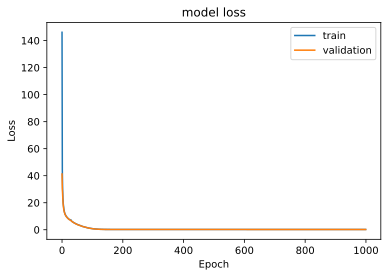

In [12]:
plot_loss(history)

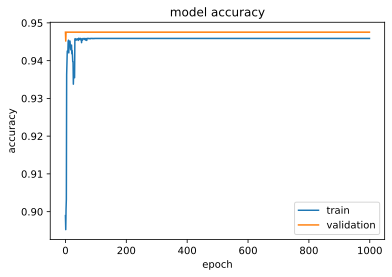

In [13]:
plot_hist(history)

In [14]:
# evaluate the model
train_loss, train_acc = model.evaluate([X_img_train, X_audio_train], y_train, verbose=0)
test_loss, test_acc = model.evaluate([X_img_test, X_audio_test], y_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.192, Train_Acc: 0.946
Test_Loss: 0.191, Test_Acc: 0.948


In [15]:
pred = model.predict([X_img_test, X_audio_test])

In [16]:
y_pred = (model.predict([X_img_test, X_audio_test]) > 0.5)*1    #.astype("int32")

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

score: 0.9475417548812044
Precision: 0.0
Recall: 0.0
F1_score: 0.0


In [18]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[4028    0]
 [ 223    0]]


In [19]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4028
           1       0.00      0.00      0.00       223

    accuracy                           0.95      4251
   macro avg       0.47      0.50      0.49      4251
weighted avg       0.90      0.95      0.92      4251



In [20]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 4028 0 223 0
